In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airplane-crashes-and-fatalities-upto-2023/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 

In [3]:
df=pd.read_csv('/kaggle/input/airplane-crashes-and-fatalities-upto-2023/Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv',encoding='ISO-8859-1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

#  Data Cleaning

**replace the white space wit "_"**

In [5]:
df.columns=df.columns.str.replace(' ','_')
df.head()

,Date,Time,Location,Operator,Flight_#,Route,AC_Type,Registration,cn/ln,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


**check the null value and duplicates**

In [6]:
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight_#                 3669
Route                     777
AC_Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard_Passangers         229
Aboard_Crew               226
Fatalities                  8
Fatalities_Passangers     242
Fatalities_Crew           241
Ground                     42
Summary                    64
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date                     0
Time                     0
Location                 0
Operator                 0
Flight_#                 0
Route                    0
AC_Type                  0
Registration             0
cn/ln                    0
Aboard                   0
Aboard_Passangers        0
Aboard_Crew              0
Fatalities               0
Fatalities_Passangers    0
Fatalities_Crew          0
Ground                   0
Summary                  0
dtype: int64

In [9]:
df.duplicated().sum()

0

**seperate date  column to month and year columns**

In [10]:
df['Date']=pd.to_datetime(df['Date']) # convert Date column to date time formate first 
df['month']=df['Date'].dt.month
df['year']=df['Date'].dt.year

In [11]:
df.head()

,Date,Time,Location,Operator,Flight_#,Route,AC_Type,Registration,cn/ln,Aboard,Aboard_Passangers,Aboard_Crew,Fatalities,Fatalities_Passangers,Fatalities_Crew,Ground,Summary,month,year
217,1930-01-19,18:23,"Oceanside, California",Maddux Airlines,7,"Aqua Caliente, Mexico - Los Angeles",Ford 5-AT-C Tri Motor,NC9689,5-AT-046,16.0,14.0,2.0,16.0,14.0,2.0,0.0,"While en route to Los Angeles, the pilot, flyi...",1,1930
247,1931-03-31,10:45,"Bazaar, Kansas",Trans Continental and Western Air,599,Kansas City - Wichita - Los Angeles,Fokker F10A Trimotor,NC-999,1063,8.0,6.0,2.0,8.0,6.0,2.0,0.0,"Shortly after taking off from Kansas City, one...",3,1931
348,1934-08-31,22:45,"Amazonia, Missouri",Rapid Air Transport,6,Kansas City - Saint Joseph - Omaha,Stinson SM-6000B,NC11118,5004,5.0,4.0,1.0,5.0,4.0,1.0,0.0,The plane crashed about 11 miles from St. Jose...,8,1934
370,1935-05-06,3:30,"Atlanta, Missouri",Trans Continental and Western Air,6,Los Angeles - Albuquerque - Kanasas City - Wa...,Douglas DC-2-112,NC13785,1295,14.0,12.0,2.0,5.0,3.0,2.0,0.0,The plane crashed while en route from Albuquer...,5,1935
384,1935-08-14,23:45,"Near Gilmer, Texas",Delta Air Lines,4,Dallas - Atlanta,Stinson Model A,NC14599,9103,4.0,3.0,1.0,4.0,3.0,1.0,0.0,Crashed 3 miles south of Gilmer. The outboard ...,8,1935


 # EDA

**which month has the highest Fatalities in totall**

<Axes: xlabel='month'>

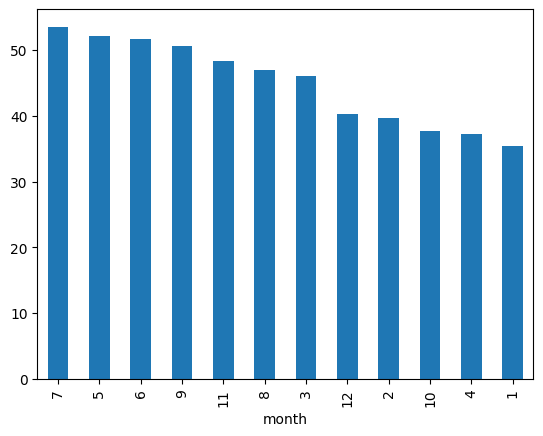

In [12]:
month_fat=df.groupby('month')['Fatalities'].mean()
month_fat=month_fat.sort_values(ascending=False)
month_fat.plot(kind='bar')

**which year has the highest Fatalities in totall**


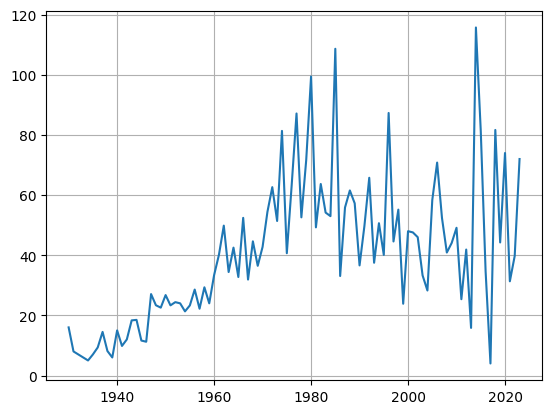

In [13]:
year_fat=df.groupby('year')['Fatalities'].mean()

plt.plot(year_fat.index,year_fat.values)
plt.grid(True)

**compare between  Fatalities in Passangers  and   Fatalities in crew per year**


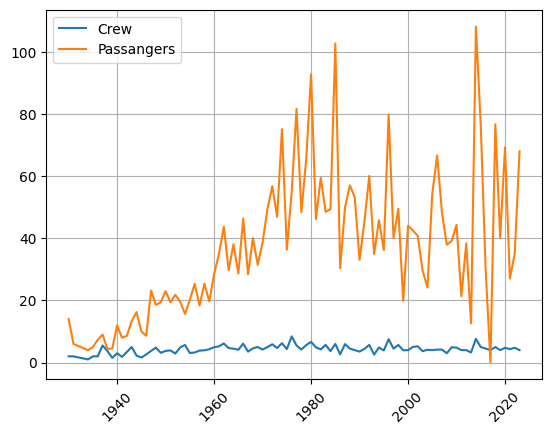

In [14]:

year_fat_pass=df.groupby('year')['Fatalities_Passangers'].mean()
year_fat_crew=df.groupby('year')['Fatalities_Crew'].mean()


plt.plot(year_fat_crew  ,label="Crew")
plt.plot(year_fat_pass,label="Passangers")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45);



**top 10 Operator  which has the highest Fatalities in Passengers**

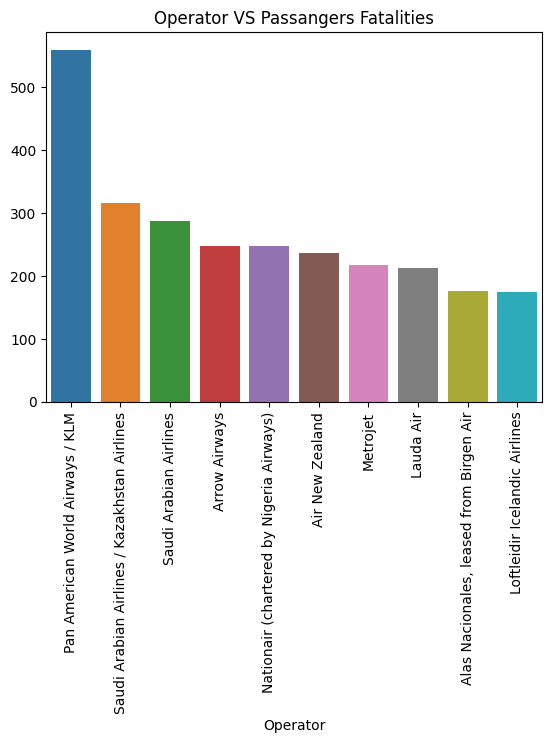

In [15]:
operator_fat_pass=df.groupby('Operator')['Fatalities_Passangers'] .mean()
operator_fat_pass= operator_fat_pass.sort_values(ascending=False)
sns.barplot(x=operator_fat_pass.nlargest(10).index,y=operator_fat_pass.nlargest(10).values)
plt.title('Operator VS Passangers Fatalities')
plt.xticks(rotation=90);

**top 10 Operator  which has the highest Fatalities in Crew**


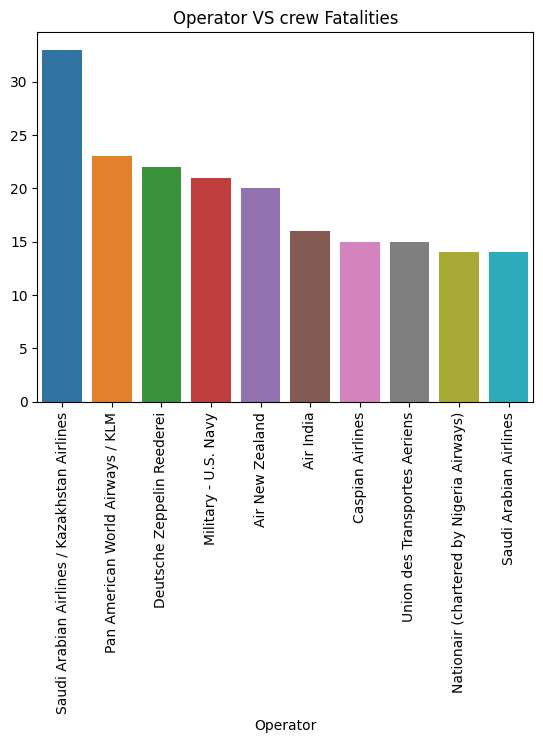

In [16]:
operator_fat_crew=df.groupby('Operator')['Fatalities_Crew'].mean()
operator_fat_crew= operator_fat_crew.sort_values(ascending=False)
sns.barplot(x=operator_fat_crew.nlargest(10).index,y=operator_fat_crew.nlargest(10).values)
plt.title('Operator VS crew Fatalities')
plt.xticks(rotation=90);

**compare between  Fatalities in Passangers  and   Fatalities in crew per month**


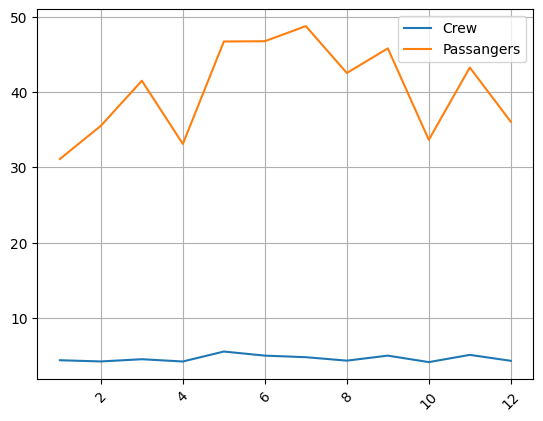

In [17]:
year_fat_pass=df.groupby('month')['Fatalities_Passangers'].mean()
year_fat_crew=df.groupby('month')['Fatalities_Crew'].mean()


plt.plot(year_fat_crew  ,label="Crew")
plt.plot(year_fat_pass,label="Passangers")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45);


**top 10 Operator  which has the highest  total Fatalities**


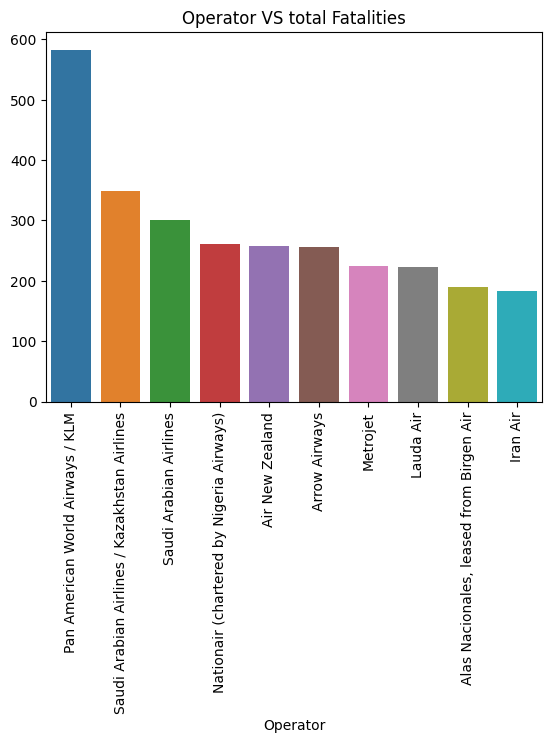

In [18]:
operator_fat_total=df.groupby('Operator')['Fatalities'].mean()
operator_fat_total= operator_fat_total.sort_values(ascending=False)
sns.barplot(x=operator_fat_total.nlargest(10).index,y=operator_fat_total.nlargest(10).values)
plt.title('Operator VS total Fatalities')
plt.xticks(rotation=90);